In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets

from collections import Counter

In [3]:
# Load the data
df = pd.read_csv('/content/drive/MyDrive/2023-CV&DL/Machine Learning/iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
# Separate features and target  
X = df_feature=df.loc[:, ["sepal.length",	"sepal.width", "petal.length","petal.width"]]
Y = df.loc[:, ["variety"]]

In [5]:
# Split the data to train and test dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [6]:
# Support vector machine algorithm
from sklearn.svm import SVC
svn = SVC(kernel='linear', C=1,probability=True) 
svn.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, kernel='linear', probability=True)

In [7]:
from sklearn.metrics import accuracy_score
# Predict from the test dataset
predictedProbability = svn.predict_proba(X_test)
print("Distribution of probability of a sample to belong to a class\n", predictedProbability) #predicted-probability for each sample to belong to a class

predictions = svn.predict(X_test)
print("vector of top predictions\n",predictions) #label-predicted

print(y_test)

# Calculate the accuracy
accuracy_score(y_test, predictions)

Distribution of probability of a sample to belong to a class
 [[6.59584775e-03 8.99009839e-01 9.43943128e-02]
 [7.93931064e-03 8.02785775e-01 1.89274915e-01]
 [1.80768761e-02 9.74078064e-01 7.84505989e-03]
 [9.51256022e-01 3.54804382e-02 1.32635403e-02]
 [1.27454078e-03 1.16214820e-04 9.98609244e-01]
 [9.23755441e-01 5.77079356e-02 1.85366232e-02]
 [7.67171961e-03 1.55563943e-02 9.76771886e-01]
 [4.27176170e-03 3.15221961e-03 9.92576019e-01]
 [1.75625559e-02 9.75166580e-01 7.27086456e-03]
 [9.64286040e-01 2.43908150e-02 1.13231448e-02]
 [3.36749656e-03 2.15534643e-03 9.94477157e-01]
 [1.39050025e-02 9.77574603e-01 8.52039413e-03]
 [1.50889789e-02 3.64621940e-01 6.20289081e-01]
 [9.45733152e-01 3.96937554e-02 1.45730931e-02]
 [9.33900755e-01 4.80995148e-02 1.79997306e-02]
 [9.75225673e-01 1.50647517e-02 9.70957569e-03]
 [8.09361426e-03 8.43061363e-01 1.48845023e-01]
 [9.43085414e-01 4.20734730e-02 1.48411128e-02]
 [7.77542460e-03 8.80996349e-01 1.11228227e-01]
 [9.43345345e-01 4.1397350

0.9333333333333333

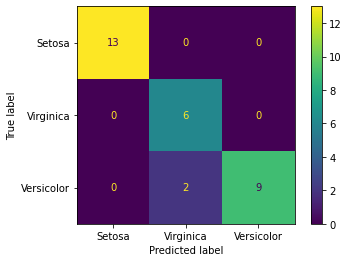

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

classes=["Setosa", "Virginica", "Versicolor"]
cm = confusion_matrix(y_test, predictions, labels=classes)
cmd = ConfusionMatrixDisplay(cm, display_labels=classes)
cmd.plot()